<a href="https://colab.research.google.com/github/Rishit605/Deep-Learning/blob/main/PlantVillage_Custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! mkdir dataset

In [ ]:
cd /content/dataset

/content/dataset


In [ ]:
! kaggle datasets download -d emmarex/plantdisease

100% 655M/658M [00:17<00:00, 43.4MB/s]
100% 658M/658M [00:17<00:00, 40.4MB/s]


In [ ]:
! unzip /content/dataset/plantdisease.zip

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator as IDG

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
data='/content/dataset/PlantVillage/'

In [ ]:
# PARAMS

BATCH_SIZE=64
IMG_SIZE=(200, 200)

In [ ]:
train_datagen = IDG(
    rescale = 1/.225,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=20,
    height_shift_range=20,
    rotation_range=0.2,
    horizontal_flip=True,
)

valid_datagen = IDG(
    rescale = 1/.225,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=20,
    height_shift_range=20,
    rotation_range=0.2,
    horizontal_flip=True,
)

train_gen = train_datagen.flow_from_directory(
    data,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
)

valid_gen = valid_datagen.flow_from_directory(
    data,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
)

Found 20638 images belonging to 15 classes.
Found 20638 images belonging to 15 classes.


In [ ]:
class_count = len(list(train_gen.class_indices.keys()))
class_count

15

In [ ]:
model = Sequential([
    layers.Conv2D(32, (3,3), strides=(2,2), padding='valid', activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, (3,3), activation='relu', padding='valid', strides=(2,2)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='valid', strides=(2,2)),
    layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Conv2D(128, (3,3), activation='relu', padding='valid', strides=(2,2)),
#     layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
#     layers.Dense(256, activation='relu'),
    # layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
    layers.Dense(class_count, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
opt = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history=model.fit(train_gen, validation_data=valid_gen, epochs=10, steps_per_epoch = train_gen.samples//BATCH_SIZE, validation_steps = valid_gen.samples//BATCH_SIZE, verbose=1)

Epoch 1/10
322/322 [==============================] - 481s 1s/step - loss: 4.2191 - accuracy: 0.4257 - val_loss: 1.2359 - val_accuracy: 0.5885
Epoch 2/10
322/322 [==============================] - 471s 1s/step - loss: 1.0701 - accuracy: 0.6454 - val_loss: 0.9127 - val_accuracy: 0.6900
Epoch 3/10
322/322 [==============================] - 471s 1s/step - loss: 0.8604 - accuracy: 0.7132 - val_loss: 0.7097 - val_accuracy: 0.7571
Epoch 4/10
322/322 [==============================] - 412s 1s/step - loss: 0.7374 - accuracy: 0.7515 - val_loss: 0.6333 - val_accuracy: 0.7807
Epoch 5/10
322/322 [==============================] - 471s 1s/step - loss: 0.6904 - accuracy: 0.7660 - val_loss: 0.6638 - val_accuracy: 0.7742
Epoch 6/10
322/322 [==============================] - 472s 1s/step - loss: 0.6246 - accuracy: 0.7873 - val_loss: 0.6028 - val_accuracy: 0.7942
Epoch 7/10
322/322 [==============================] - 471s 1s/step - loss: 0.5903 - accuracy: 0.7978 - val_loss: 0.5870 - val_accuracy: 0.8004

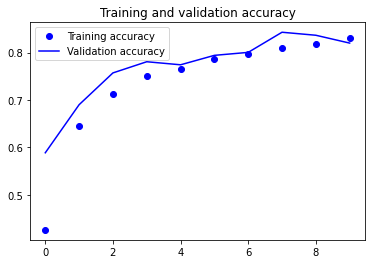

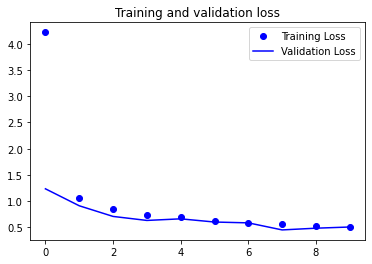

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
plot_loss_acc(history)

In [ ]:
model.save('/content/CNN-PlantVill.h5')

NameError: ignored

In [ ]:
import os

# Set the directory path
directory_path = '/content/dataset/PlantVillage/'

names = []

# Iterate through the directories in the path
for dir_name in os.listdir(directory_path):
    if os.path.isdir(os.path.join(directory_path, dir_name)):
        # Print the name of the directory if it is a directory
        names.append(dir_name)
        # print(dir_name)

names

['Potato___Early_blight',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Pepper__bell___healthy',
 'Tomato_Early_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Bacterial_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato__Target_Spot']

In [ ]:
import cv2
 
# Define a list of class labels
class_labels = names

model = model.load('/content/CNN-PlantVill.h5')

# Define the prediction function
def predict(image_path):
    # Load the image and preprocess it
    image = cv2.imread(image_path)
    image = cv2.resize(image, (200, 200))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)

    # Make a prediction
    predictions = model.predict(image)

    # Get the predicted class label
    predicted_label = class_labels[np.argmax(predictions)]

    # Get the predicted class probability
    predicted_prob = np.max(predictions)

    # Return the predicted label and probability
    return predicted_label, predicted_prob